# Introduction
Dans cet étude de cas, je travaille en tant que Data Scientist pour une banque. La banque dispose de données complètes sur ses clients pour les 6 derniers mois. Mon objectif principal est d'aider l'équipe marketing de la banque à lancer une campagne marketing ciblée en divisant ses clients en au moins 3 groupes distincts selon ce qui les caractérise.

Nous sommes dans le cas d'une apprentissage non supervisée. De ce fait, notre choix s'est porté sur les modèles de Machine Learning suivants :  
- Le K Means
- Le PCA ou Analyse à Composantes Principales
avec l'utilisation des techniques telles que :
- Le "Elbow method" ou "méthode du coude"
- L'auto-encodage

Nous commencerons l'analyse par importer les données, les nettoyer, les imputer (gestion données manquantes), les standardiser si necessaire et enfin proceder aux apprentissages et classifications.

Source des données Kaggle: https://www.kaggle.com/arjunbhasin2013/ccdata

----------------------


In this case study, I am working as a Data Scientist to a bank. The bank has extensive data on their costumers for the past 6 months. My main goal is to help the marketing team of the bank to lauch a targeted and marketing campaign by dividing their customers into at least 3 distinctive groups.

We are dealing with unsupervised learning. For this reason, we have chosen the following Machine Learning models:  
- K Means
- PCA or Principal Component Analysis
with the use of techniques such as
- Elbow method
- Autocoding

We begin the analysis by importing the data, cleaning it up, imputing it (managing missing data), standardizing it if necessary, and finally proceeding to the learning and classification stages.

Data Source: https://www.kaggle.com/arjunbhasin2013/ccdata

# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE


<table>
  <tr><td>
    <img src="https://drive.google.com/uc?id=1OjWCpwRHlCSNYaJoUUd2QGryT9CoQJ5e"
         alt="Fashion MNIST sprite"  width="1000">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Customers Segmentation
  </td></tr>
</table>


![alt text](https://drive.google.com/uc?id=1Q43AkxxDy4g-zl5lIX4_PBJtTguh4Ise)

![alt text](https://drive.google.com/uc?id=1uS6vsccMt3koetsp3k9cAIfbpJw7Z1J8)

![alt text](https://drive.google.com/uc?id=1vMr3ouoZ6Pc1mba1mBm2eovlJ3tfE6JA)

![alt text](https://drive.google.com/uc?id=1VvqzWWY8wFGeP4cl-rVtWVOg1P6saHfZ)

![alt text](https://drive.google.com/uc?id=1LpdL0-4E9lbc4s-x6eJ5zkyIVw_OpHuJ)

In this case study, I am working as a Data Scientist to a bank. The bank has extensive data on their costumers for the past 6 months. My main goal is to help the marketing team of the bank to lauch a targeted and marketing campaign by dividing their customers into at least 3 distinctive groups.

Data Source: https://www.kaggle.com/arjunbhasin2013/ccdata



# TASK #2: IMPORT LIBRARIES AND DATASETS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
creditcard_df = pd.read_csv('/content/drive/My Drive/Marketing_data.csv')
#https://drive.google.com/file/d/1kxNZ2y5avKV9K_MKQQYpD1pSEgDupbWm/view?usp=drive_link
# CUSTID: Identification of Credit Card holder
# BALANCE: Balance amount left in customer's account to make purchases
# BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
# PURCHASES: Amount of purchases made from account
# ONEOFFPURCHASES: Maximum purchase amount done in one-go
# INSTALLMENTS_PURCHASES: Amount of purchase done in installment
# CASH_ADVANCE: Cash in advance given by the user
# PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
# ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
# PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
# CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
# CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
# PURCHASES_TRX: Number of purchase transactions made
# CREDIT_LIMIT: Limit of Credit Card for user
# PAYMENTS: Amount of Payment done by user
# MINIMUM_PAYMENTS: Minimum amount of payments made by user
# PRC_FULL_PAYMENT: Percent of full payment paid by user
# TENURE: Tenure of credit card service for user

In [4]:
creditcard_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [5]:
creditcard_df.info()
# 18 features with 8950 points

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
creditcard_df.describe()
# Mean balance is $1564
# Balance frequency is frequently updated on average ~0.9
# Purchases average is $1000
# one off purchase average is ~$600
# Average purchases frequency is around 0.5
# average ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY are generally low
# Average credit limit ~ 4500
# Percent of full payment is 15%
# Average tenure is 11 years

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [7]:
# Let's see who made one off purchase of $40761!
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.25]


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [8]:
#who made the maximum purchase
creditcard_df['CASH_ADVANCE'].max()

47137.21176

# TASK #3: VISUALIZE AND EXPLORE DATASET

<Axes: >

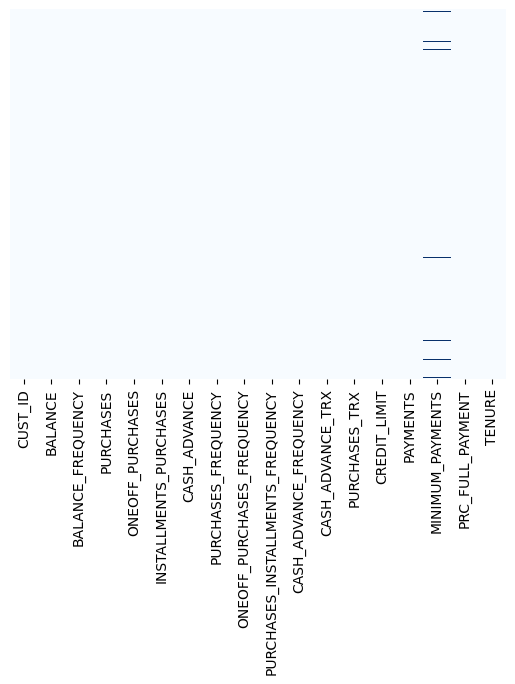

In [11]:
# Let's see if we have any missing data, luckily we don't!
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")


In [12]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [13]:
# Fill up the missing elements with mean of the 'MINIMUM_PAYMENT'
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()


In [14]:
# Fill up the missing elements with mean of the 'CREDIT_LIMIT'
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

<Axes: >

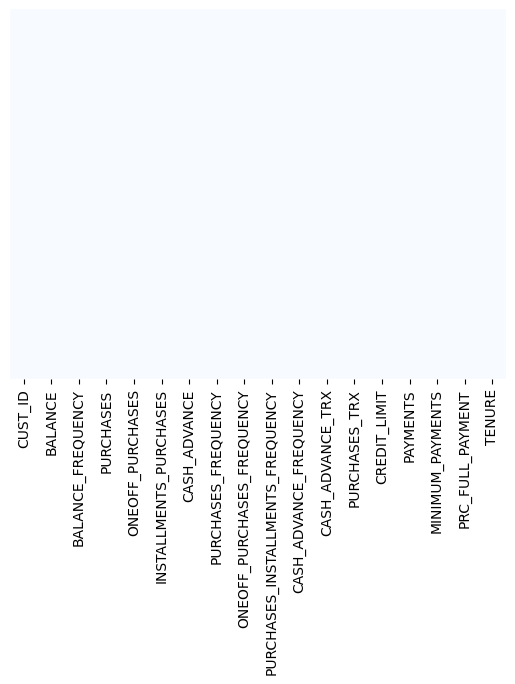

In [15]:
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [16]:
# Let's see if we have duplicated entries in the data
creditcard_df.duplicated().sum()

0

In [17]:
# Let's drop Customer ID since it has no meaning here
creditcard_df.drop("CUST_ID", axis = 1, inplace= True)

In [18]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [19]:
n = len(creditcard_df.columns)
n

17

In [20]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

<ipython-input-49-2ca65f5f0a58>:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
<ipython-input-49-2ca65f5f0a58>:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(creditcard_df[cre

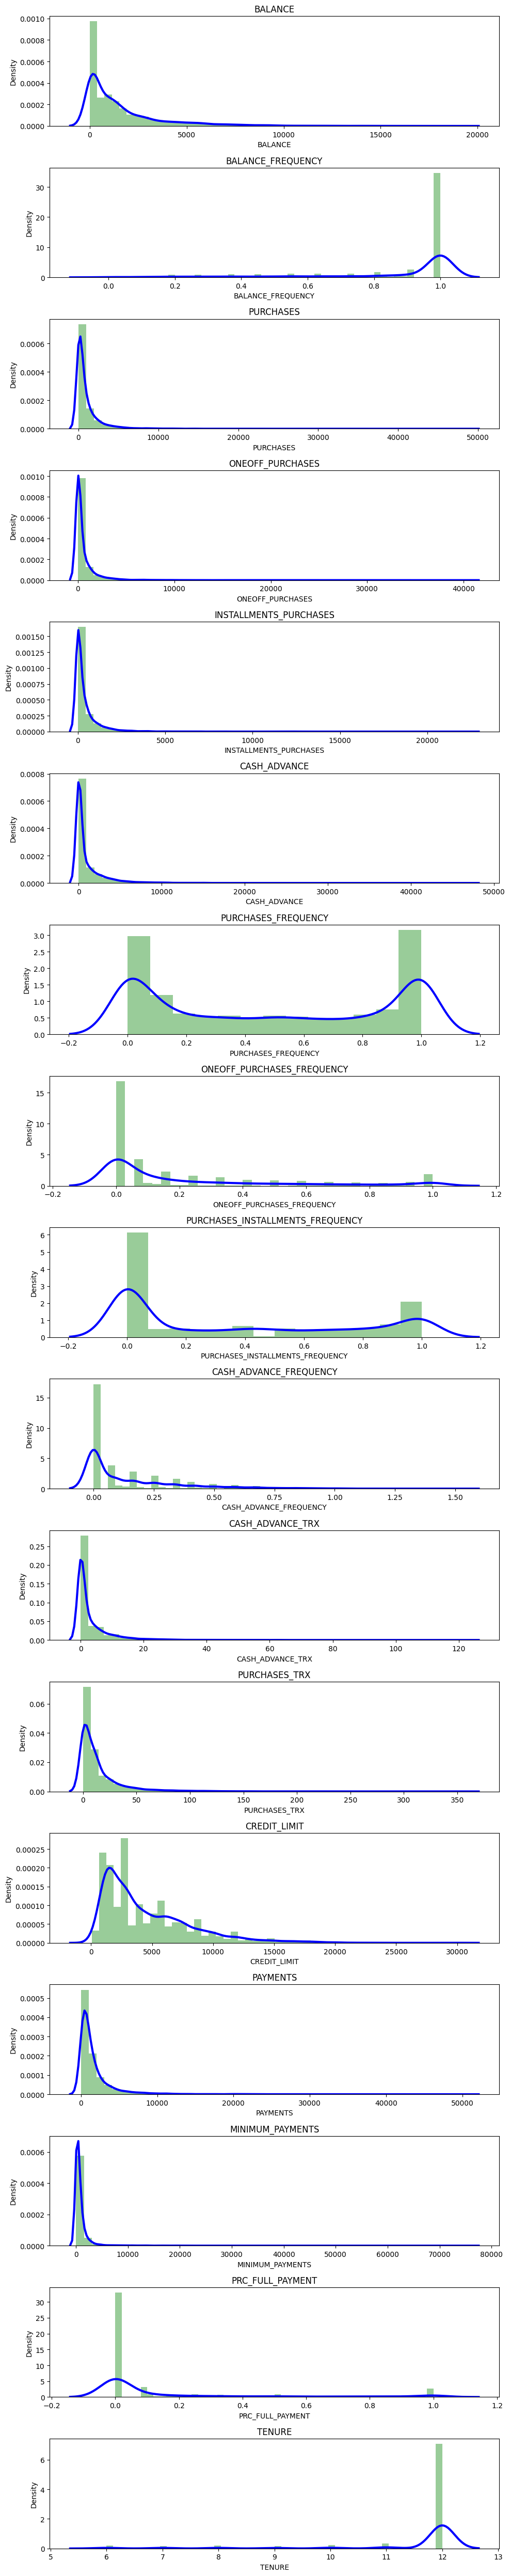

In [49]:
# displot combines the matplotlib.hist function with seaborn kdeplot()
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable.
# KDE demonstrates the probability density at different values in a continuous variable.

# Mean of balance is $1500
# 'Balance_Frequency' for most customers is updated frequently ~1
# For 'PURCHASES_FREQUENCY', there are two distinct group of customers
# For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' most users don't do one off puchases or installment purchases frequently
# Very small number of customers pay their balance in full 'PRC_FULL_PAYMENT'~0
# Credit limit average is around $4500
# Most customers are ~11 years tenure

plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17, 1, i+1)
  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
  plt.title(creditcard_df.columns[i])

plt.tight_layout()

In [22]:
# sns.pairplot(creditcard_df)
# Correlation between 'PURCHASES' and ONEOFF_PURCHASES & INSTALMENT_PURCHASES
# Trend between 'PURCHASES' and 'CREDIT_LIMIT' & 'PAYMENTS'


In [23]:
correlations = creditcard_df.corr()


<Axes: >

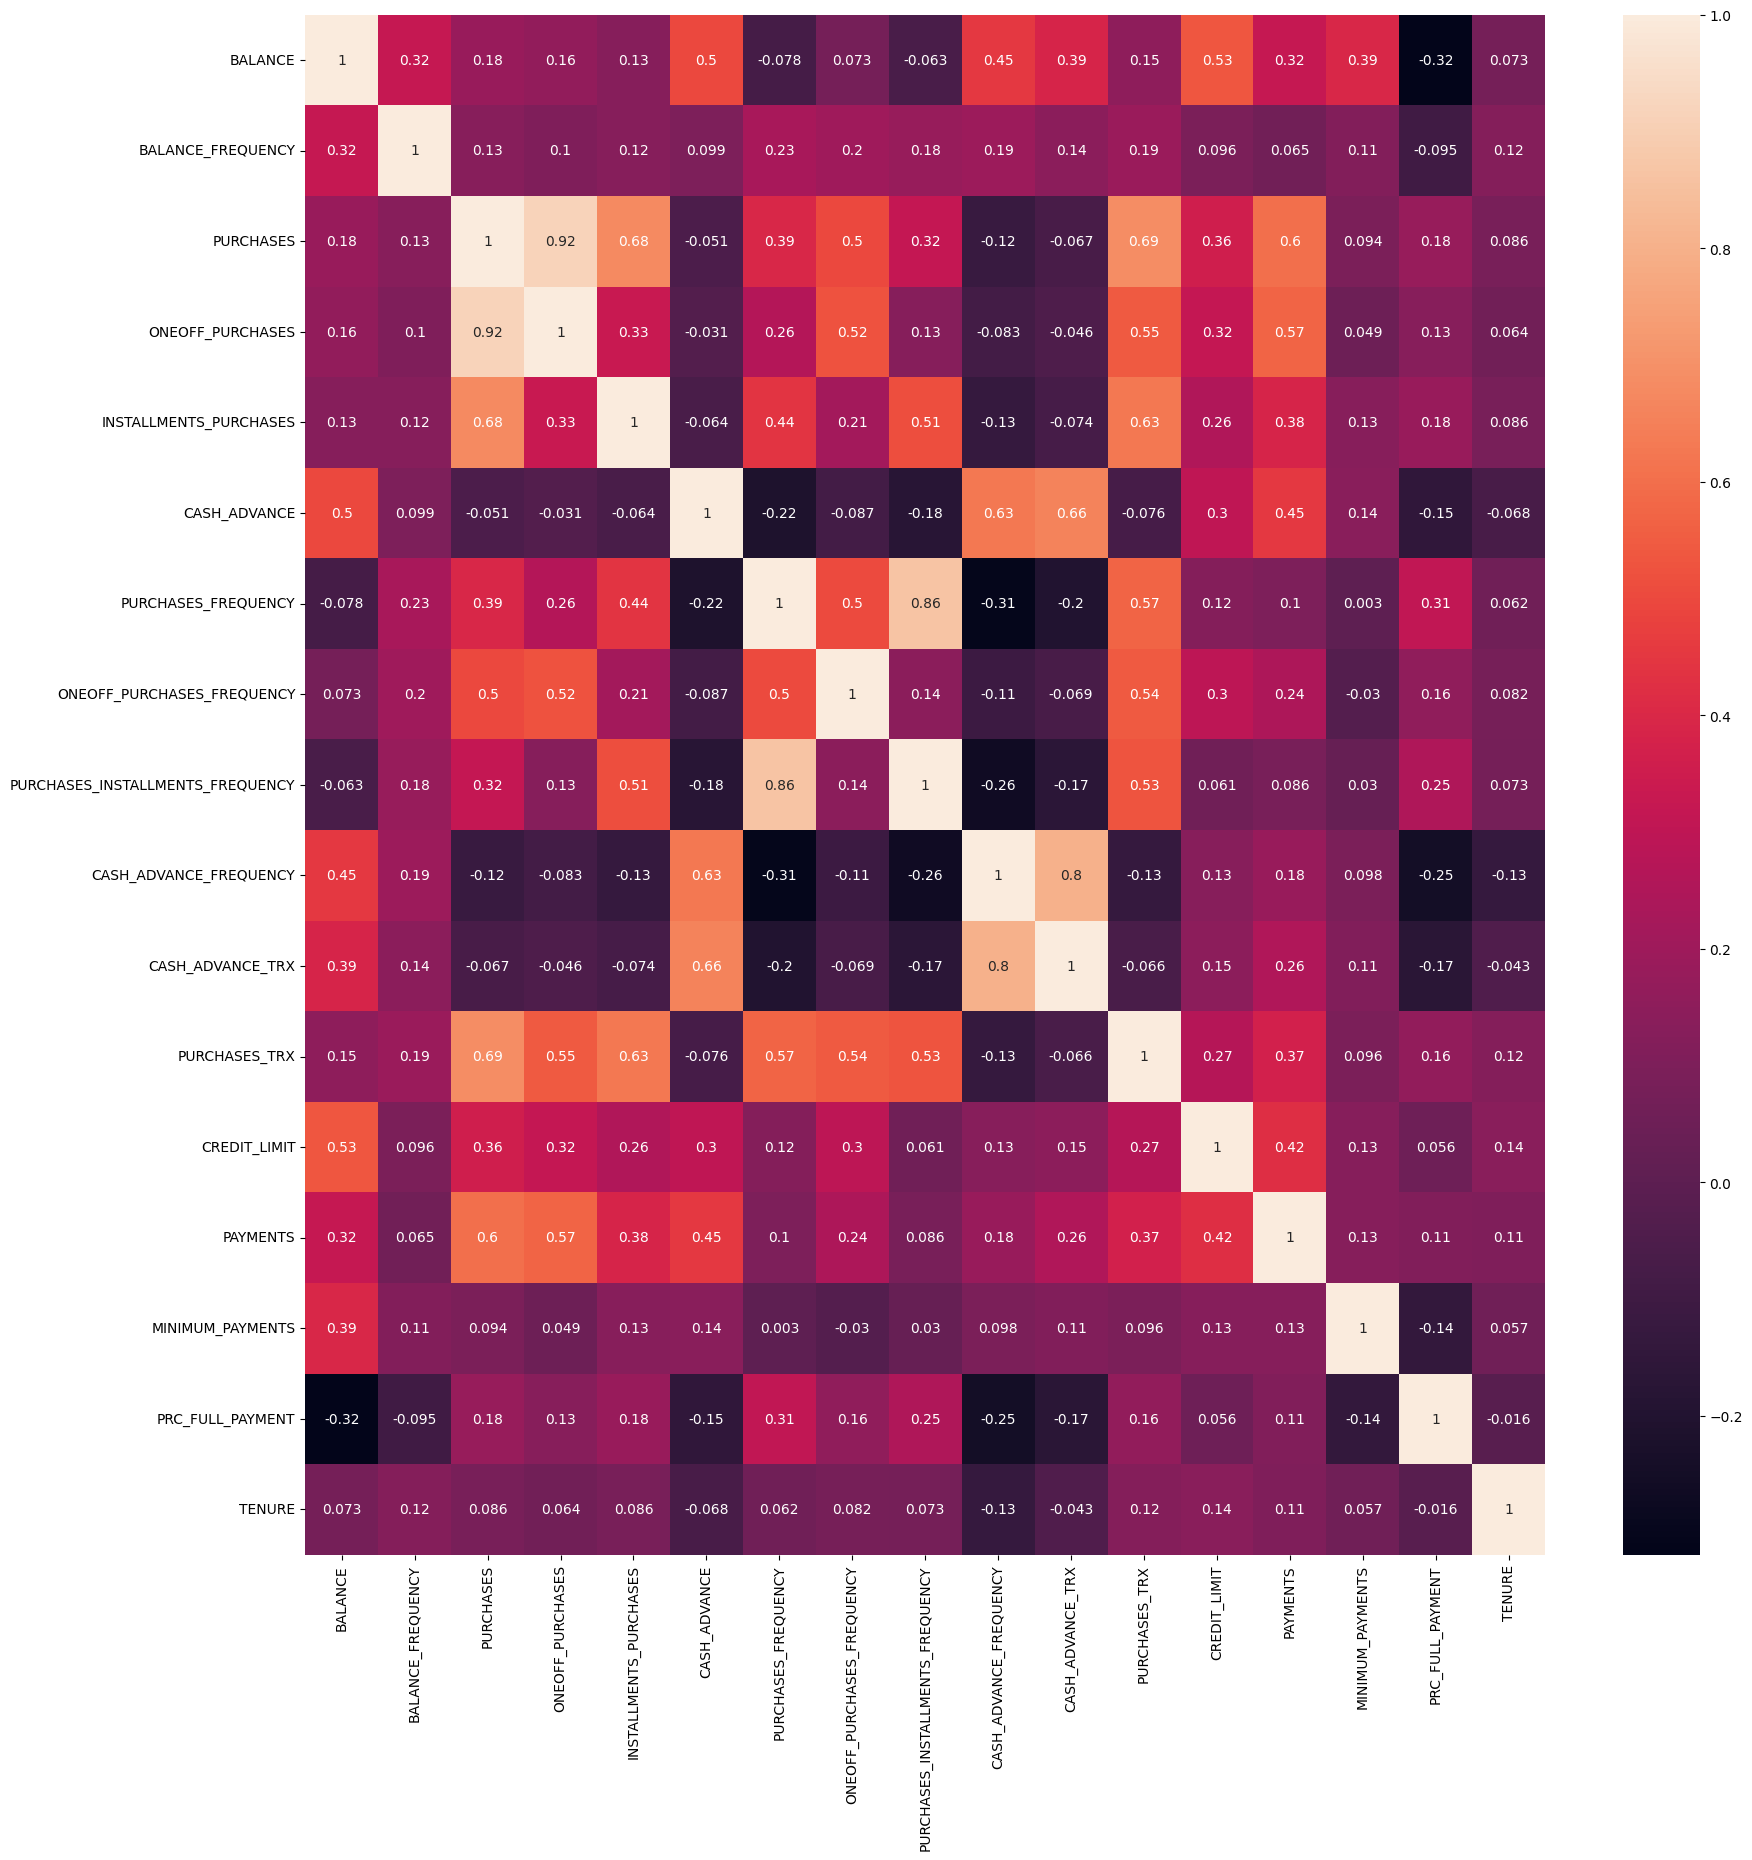

In [24]:
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)

# 'PURCHASES' have high correlation between one-off purchases, 'installment purchases, purchase transactions, credit limit and payments.
# Strong Positive Correlation between 'PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY'


# TASK #4: UNDERSTAND THE THEORY AND INTUITON BEHIND K-MEANS

# TASK #5: FIND THE OPTIMAL NUMBER OF CLUSTERS USING ELBOW METHOD

- The elbow method is a heuristic method of interpretation and validation of consistency within cluster analysis designed to help find the appropriate number of clusters in a dataset.
- If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best.
- Source:
  - https://en.wikipedia.org/wiki/Elbow_method_(clustering)
  - https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

In [25]:
# Let's scale the data first
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [26]:
creditcard_df_scaled.shape

(8950, 17)

In [27]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

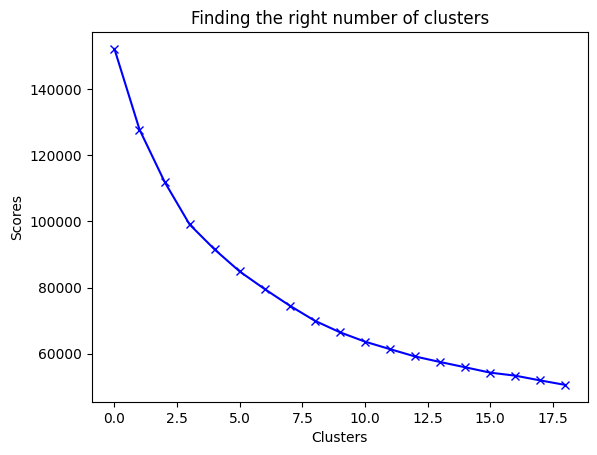

In [28]:
scores_1 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(creditcard_df_scaled)
  scores_1.append(kmeans.inertia_)

plt.plot(scores_1, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores')
plt.show()

# From this we can observe that, 4th cluster seems to be forming the elbow of the curve.
# However, the values does not reduce linearly until 8th cluster.
# Let's choose the number of clusters to be 7.

# TASK #6: APPLY K-MEANS METHOD

In [29]:
kmeans = KMeans(8)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [30]:
kmeans.cluster_centers_.shape

(8, 17)

In [31]:

cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.361001,0.331862,-0.030378,-0.240324,0.369494,-0.361645,0.995821,-0.379568,1.206547,-0.471490,-0.359190,0.194172,-0.259766,-0.213074,-0.050786,0.315093,0.255413
1,-0.700731,-2.141584,-0.309691,-0.234253,-0.301781,-0.320253,-0.553630,-0.441117,-0.438908,-0.521281,-0.376272,-0.418413,-0.173871,-0.191271,-0.256617,0.286478,0.202634
2,-0.334901,-0.349885,-0.287298,-0.212974,-0.287679,0.068020,-0.203948,-0.284236,-0.227466,0.307808,-0.000179,-0.387812,-0.562209,-0.391666,-0.208921,0.012748,-3.197669
3,-0.119916,0.402597,0.580482,0.704295,0.078431,-0.332989,0.998230,1.914630,0.212651,-0.422462,-0.336574,0.665146,0.469246,0.173099,-0.156051,0.463739,0.274920
4,0.005619,0.403109,-0.354194,-0.238722,-0.398804,-0.104881,-0.841245,-0.382925,-0.751490,0.085791,-0.040977,-0.477766,-0.307965,-0.252996,-0.012985,-0.455065,0.274011
5,1.110263,0.475718,2.571220,1.837775,2.703405,-0.125136,1.170408,1.551592,1.294742,-0.265418,-0.124742,3.223166,1.330785,1.513267,0.809454,0.237560,0.335543
6,1.656217,0.395783,-0.222410,-0.157674,-0.236277,1.981743,-0.484903,-0.210869,-0.425729,1.914764,1.910513,-0.271657,1.002481,0.786834,0.513477,-0.396038,0.073665
7,1.865907,0.332878,12.596844,13.111182,5.696389,-0.004178,1.033322,2.170634,0.866221,-0.476183,-0.214854,4.566558,3.174197,8.991136,1.064817,1.236317,0.295702


In [32]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

# First Customers cluster (Transactors): Those are customers who pay least amount of intrerest charges and careful with their money, Cluster with lowest balance ($104) and cash advance ($303), Percentage of full payment = 23%
# Second customers cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance ($5000) and cash advance (~$5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)
# Third customer cluster (VIP/Prime): high credit limit $16K and highest percentage of full payment, target for increase credit limit and increase spending habits
# Fourth customer cluster (low tenure): these are customers with low tenure (7 years), low balance


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,813.081059,0.955886,938.302500,193.549112,745.196483,220.484095,0.890022,0.089225,0.843950,0.040794,0.797619,19.536210,3549.315576,1116.315119,745.851639,0.245874,11.859127
1,105.961945,0.369949,341.545474,203.625880,138.170694,307.286565,0.268152,0.070864,0.190004,0.030830,0.681049,4.309645,3861.835401,1179.432233,266.170994,0.237505,11.788494
2,867.405752,0.794386,389.387444,238.943722,150.922955,1121.512020,0.408496,0.117664,0.274036,0.196740,3.247604,5.070288,2448.904871,599.308188,377.324957,0.157443,7.238019
3,1314.879752,0.972642,2243.414511,1761.422598,481.991913,280.576637,0.890989,0.773629,0.448950,0.050605,0.951957,31.242883,6201.759139,2234.247475,500.535333,0.289350,11.885231
4,1576.170247,0.972764,246.463378,196.208394,50.434353,758.931040,0.152718,0.088224,0.065776,0.152312,2.969192,2.834360,3373.945874,1000.743840,833.946288,0.020616,11.884016
5,3875.394281,0.989964,6496.656972,3642.768196,2855.723639,716.455532,0.960092,0.665328,0.879001,0.082031,2.397554,94.825688,9336.391437,6113.904331,2750.604313,0.223197,11.966361
6,5011.751567,0.971028,528.022564,330.730694,197.405722,5134.679615,0.295736,0.139551,0.195242,0.518308,16.286674,7.957447,8141.886389,4010.952329,2060.843739,0.037880,11.615901
7,5448.201718,0.956126,27916.555652,22354.314348,5562.241304,970.110470,0.905072,0.850000,0.708696,0.039855,1.782609,128.217391,16043.478261,27761.600386,3345.718254,0.515316,11.913043


In [33]:
labels.shape # Labels associated to each data point

(8950,)

In [34]:
labels.max()

7

In [35]:
labels.min()

0

In [36]:
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)
y_kmeans


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([6, 5, 3, ..., 0, 0, 0], dtype=int32)

In [37]:
# concatenate the clusters labels to our original dataframe
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,4
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,6
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,4
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,4


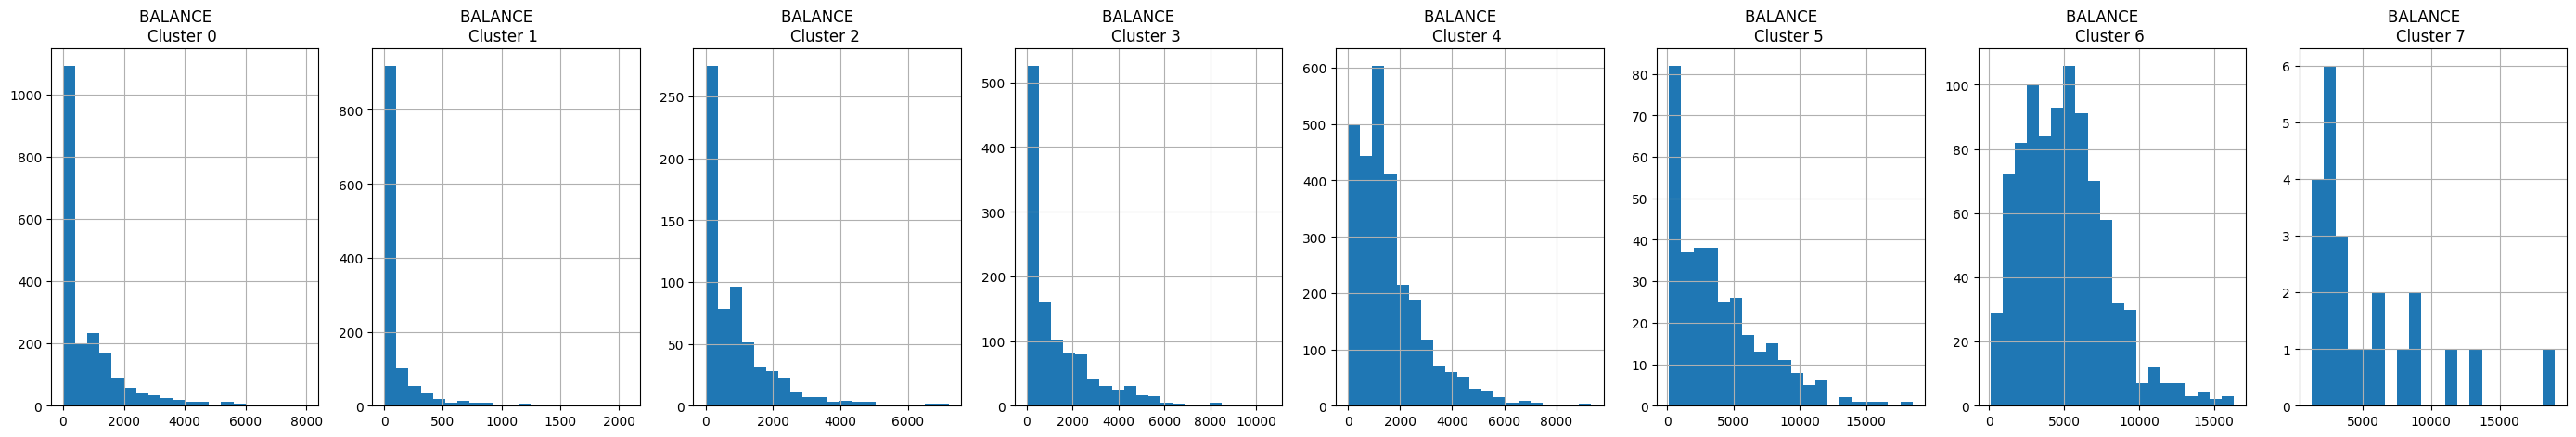

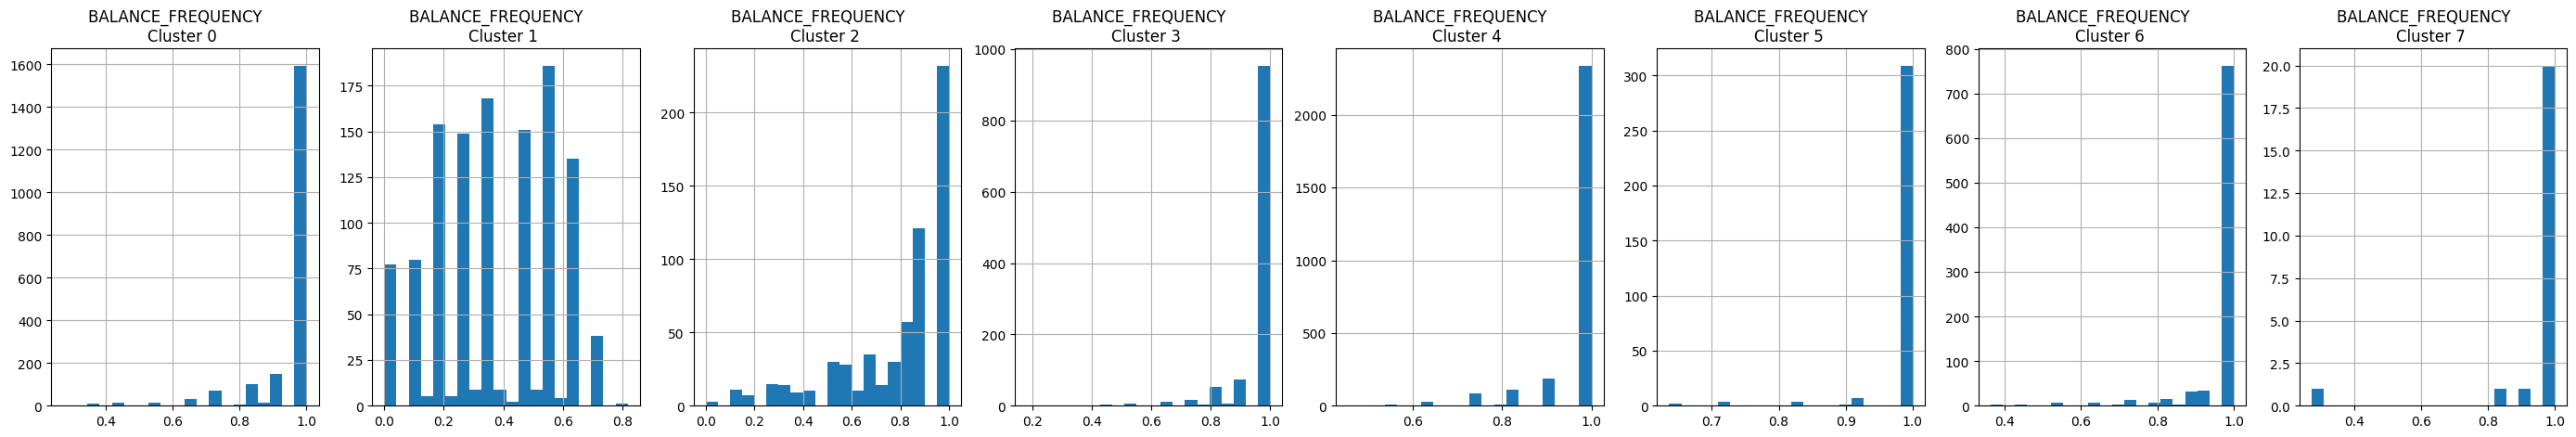

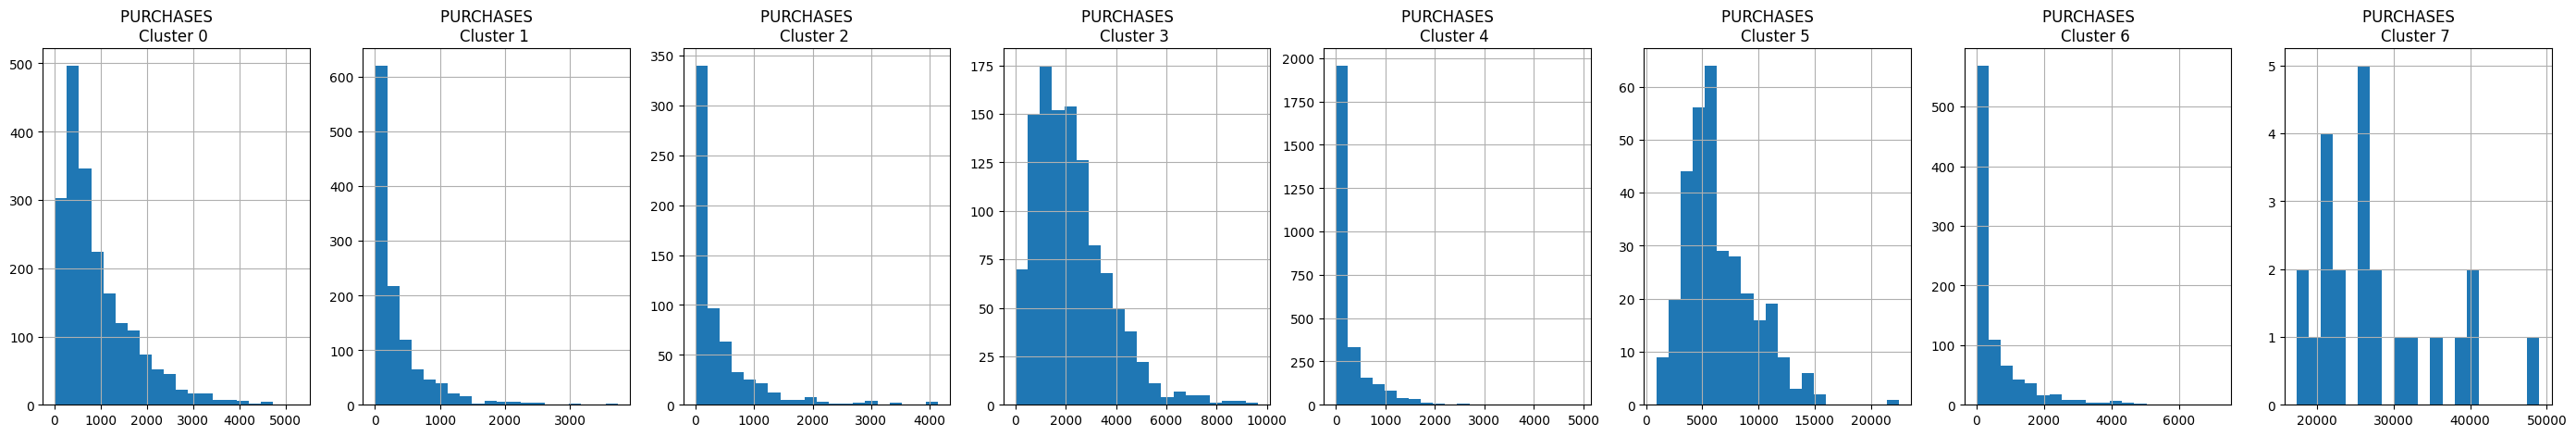

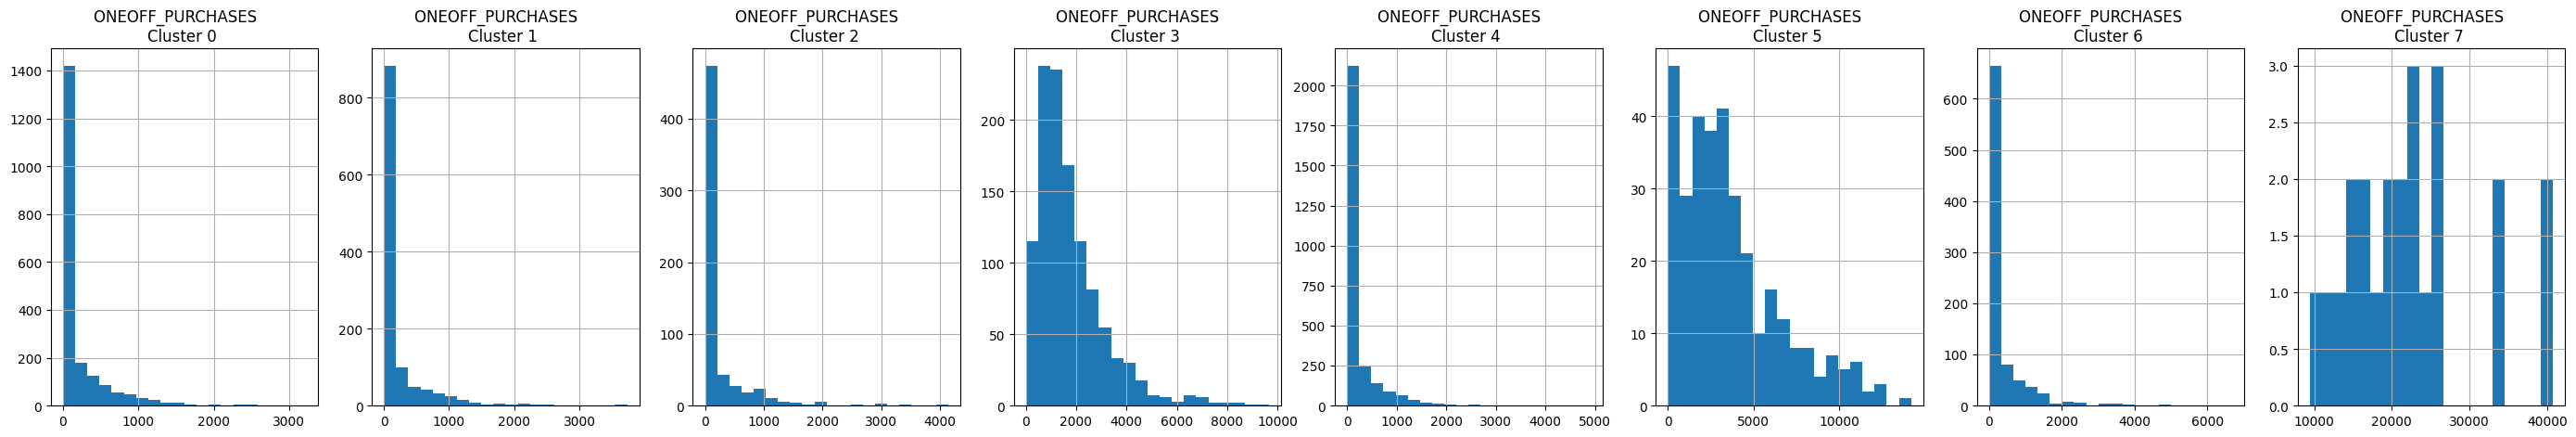

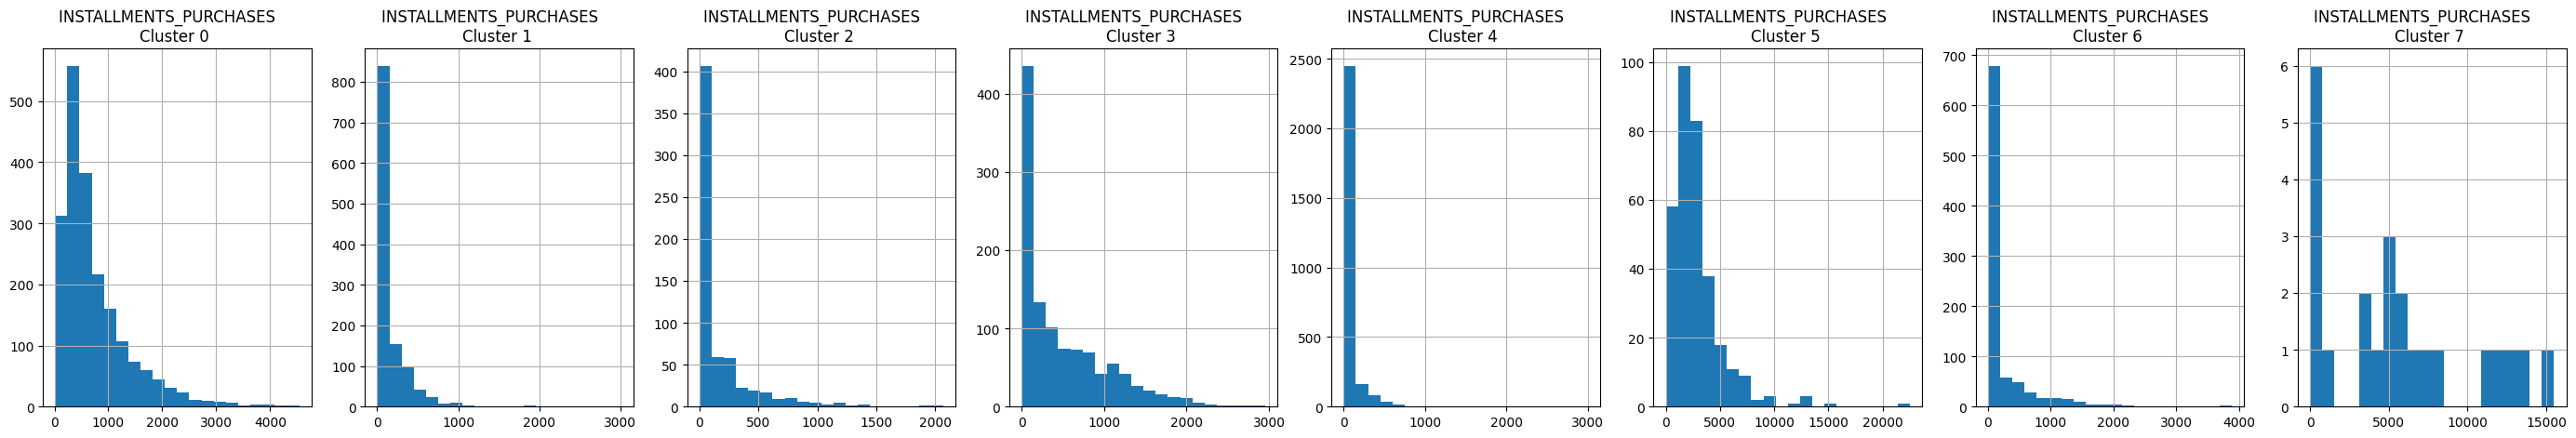

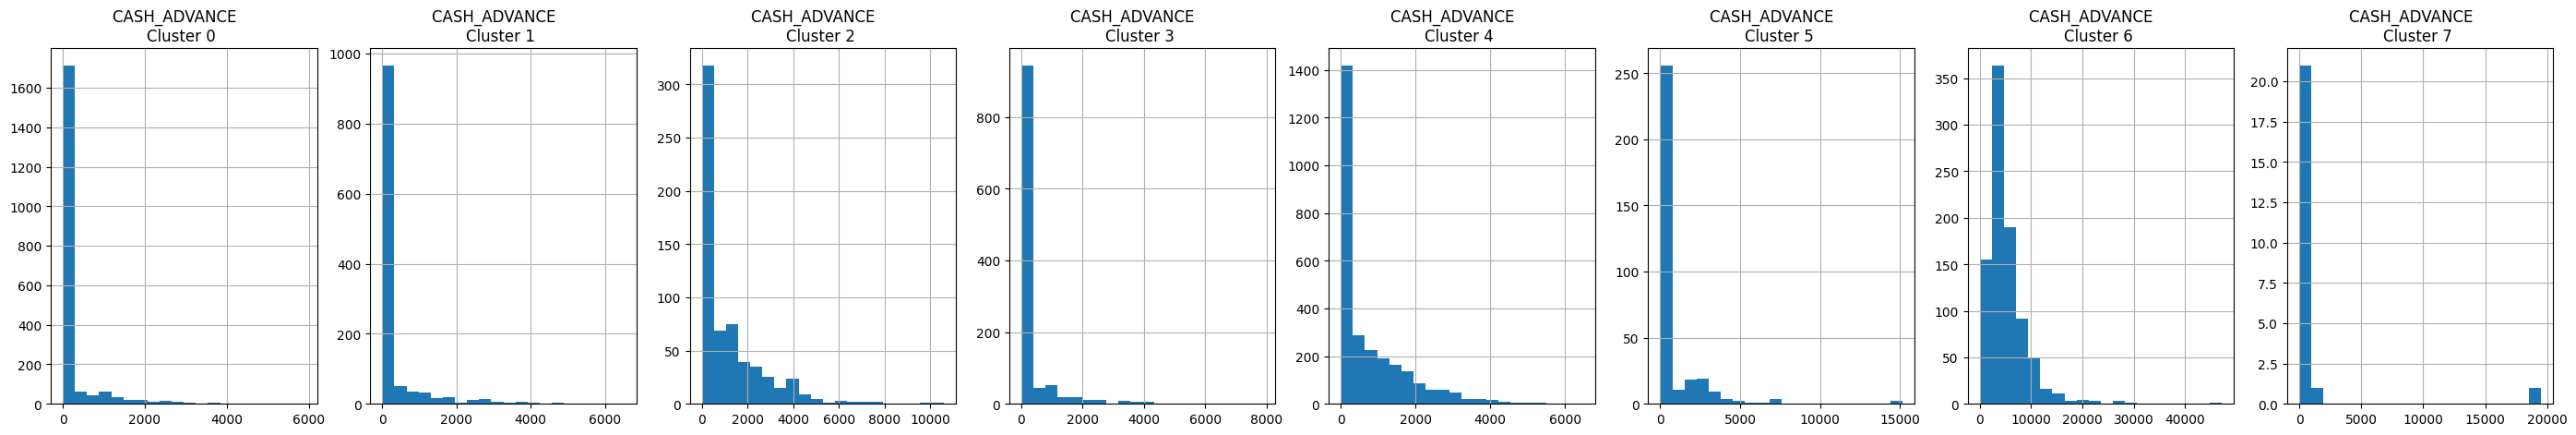

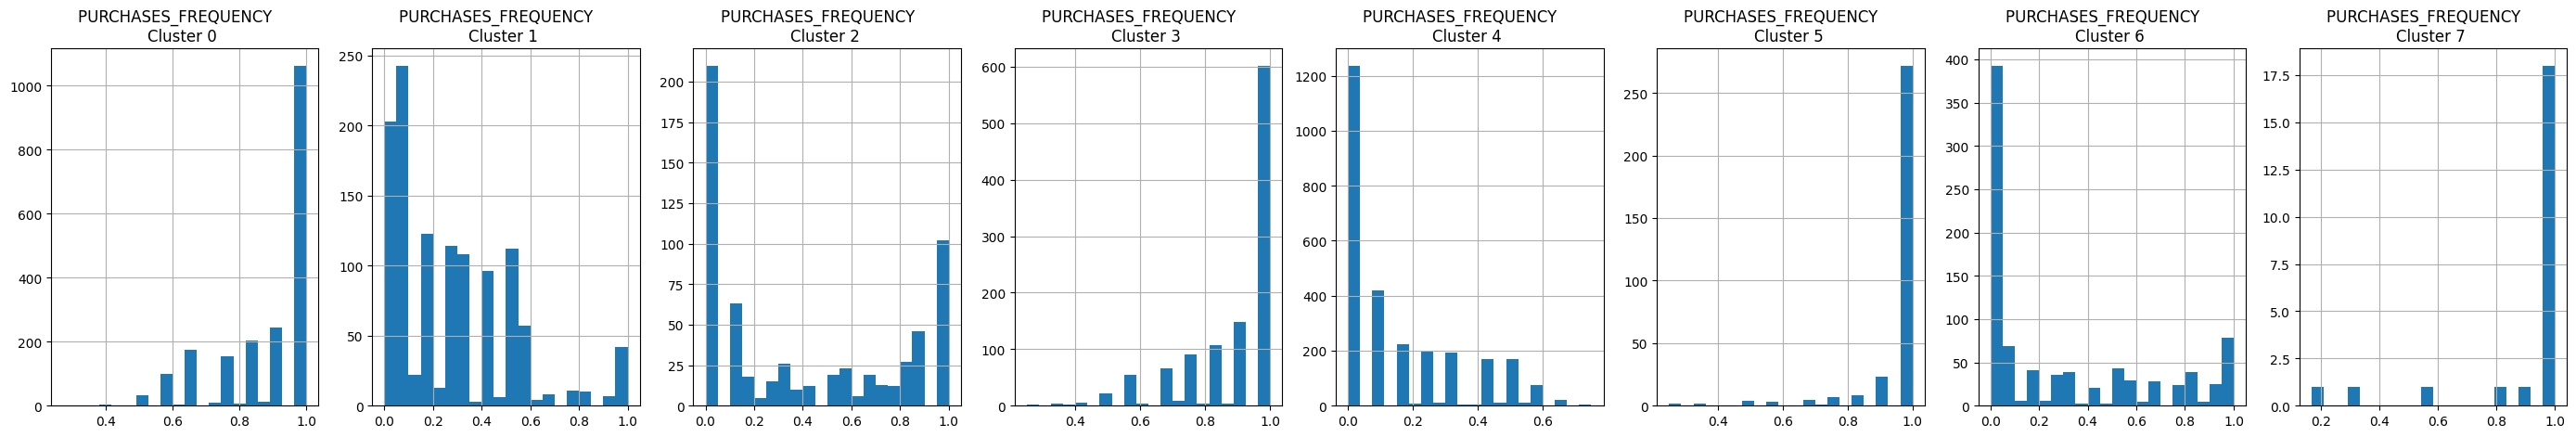

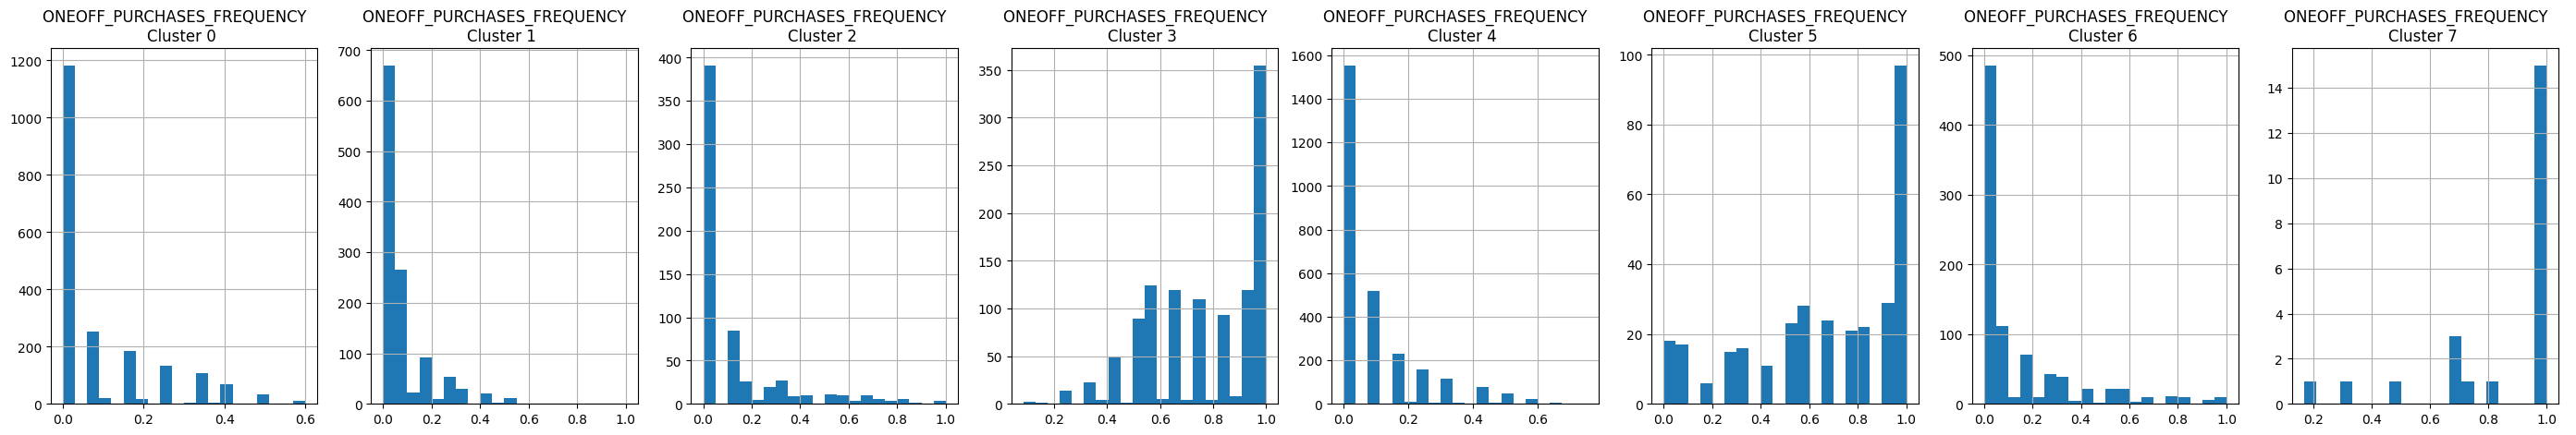

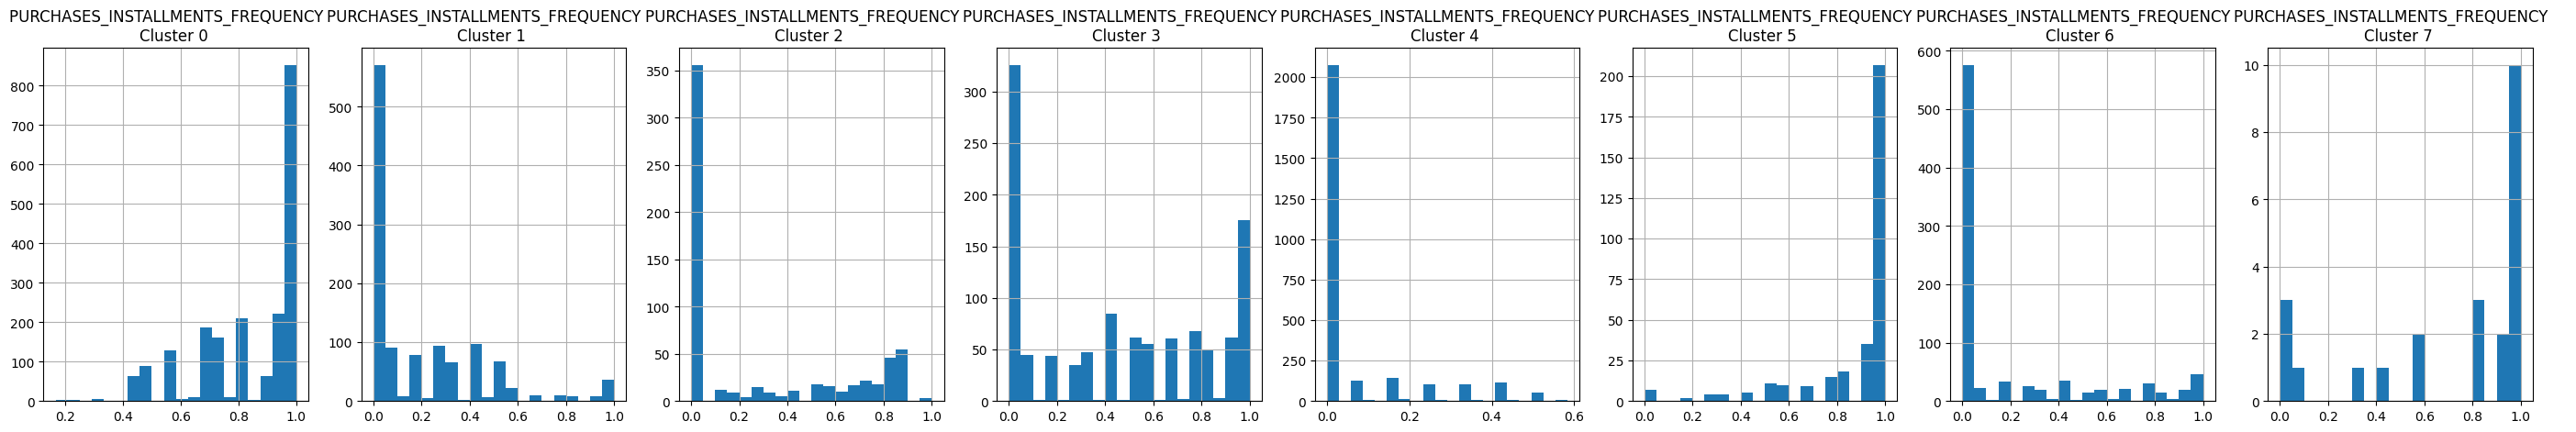

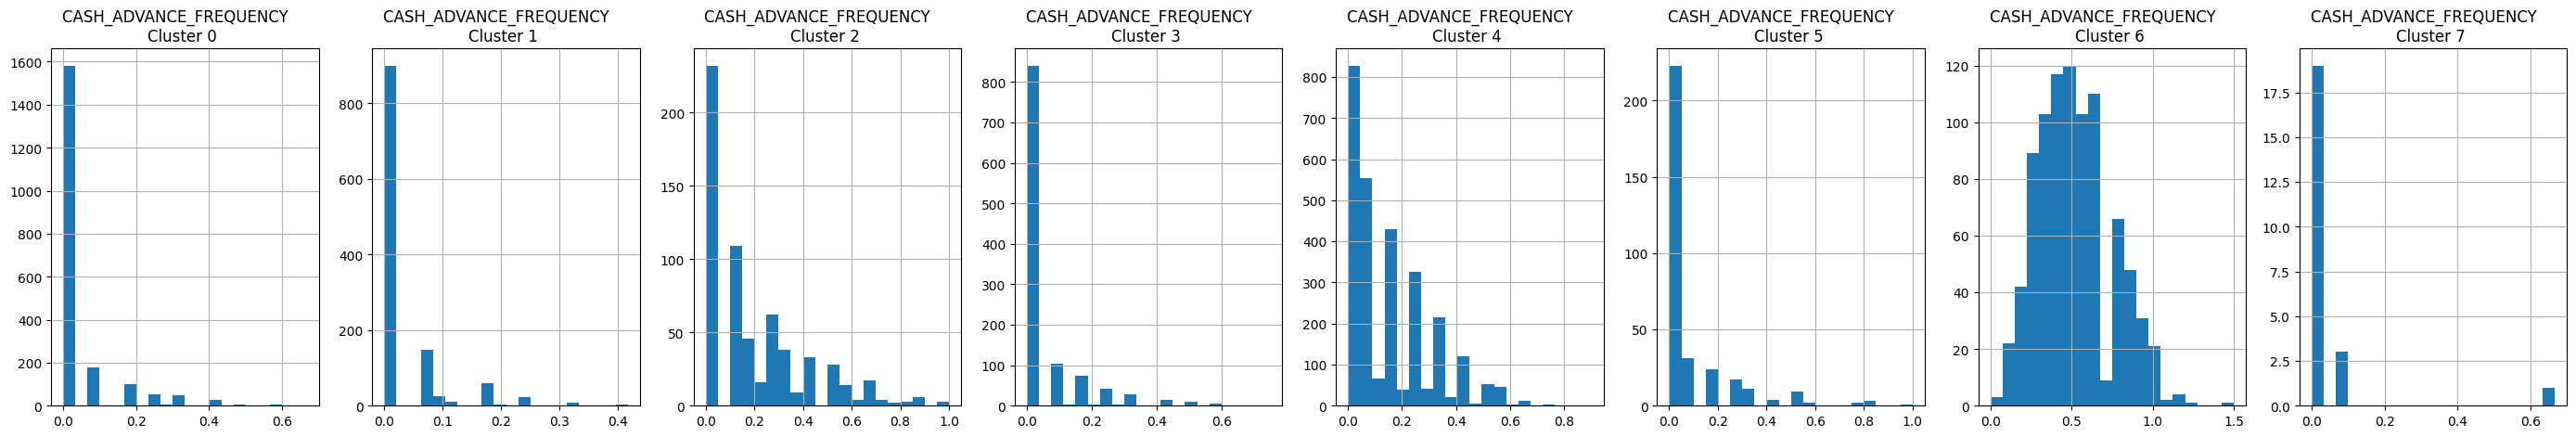

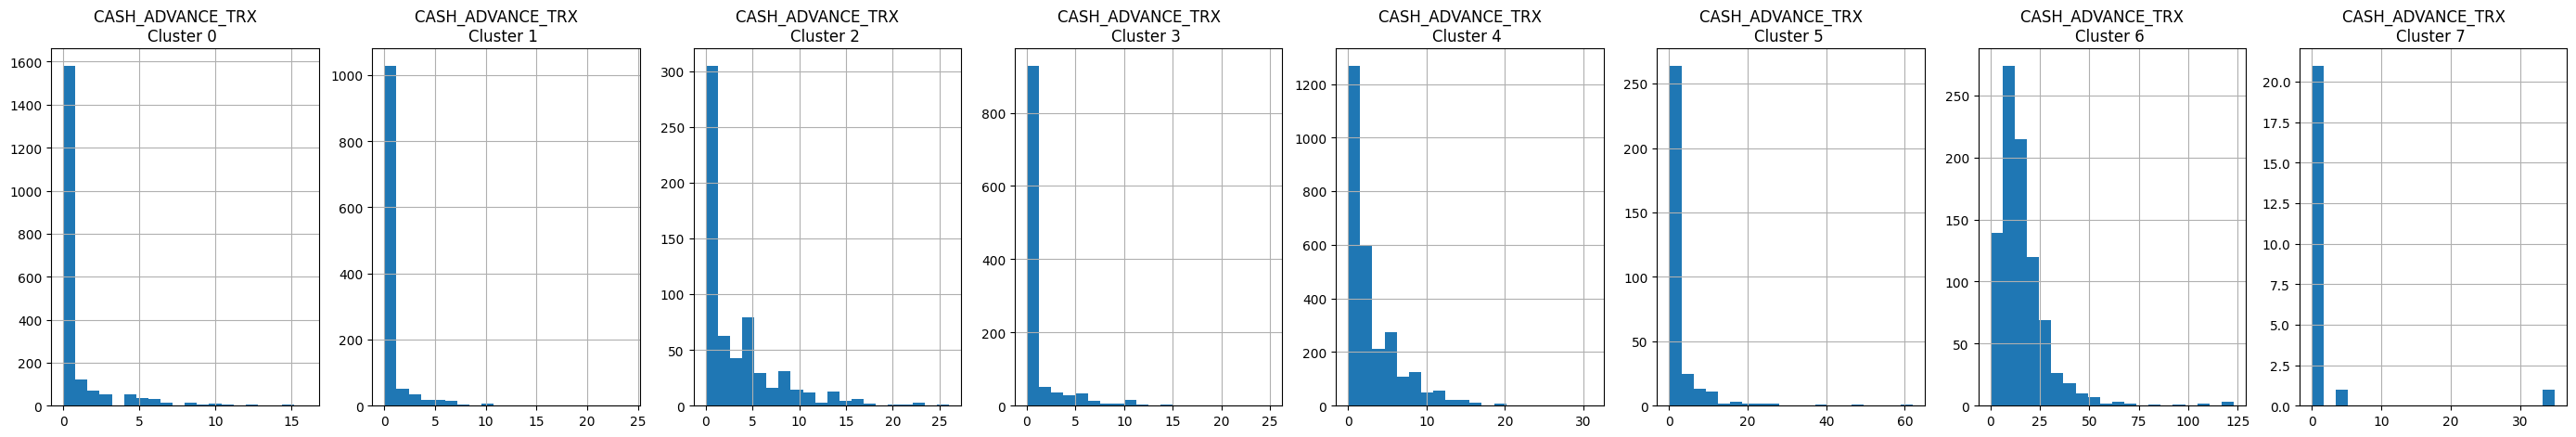

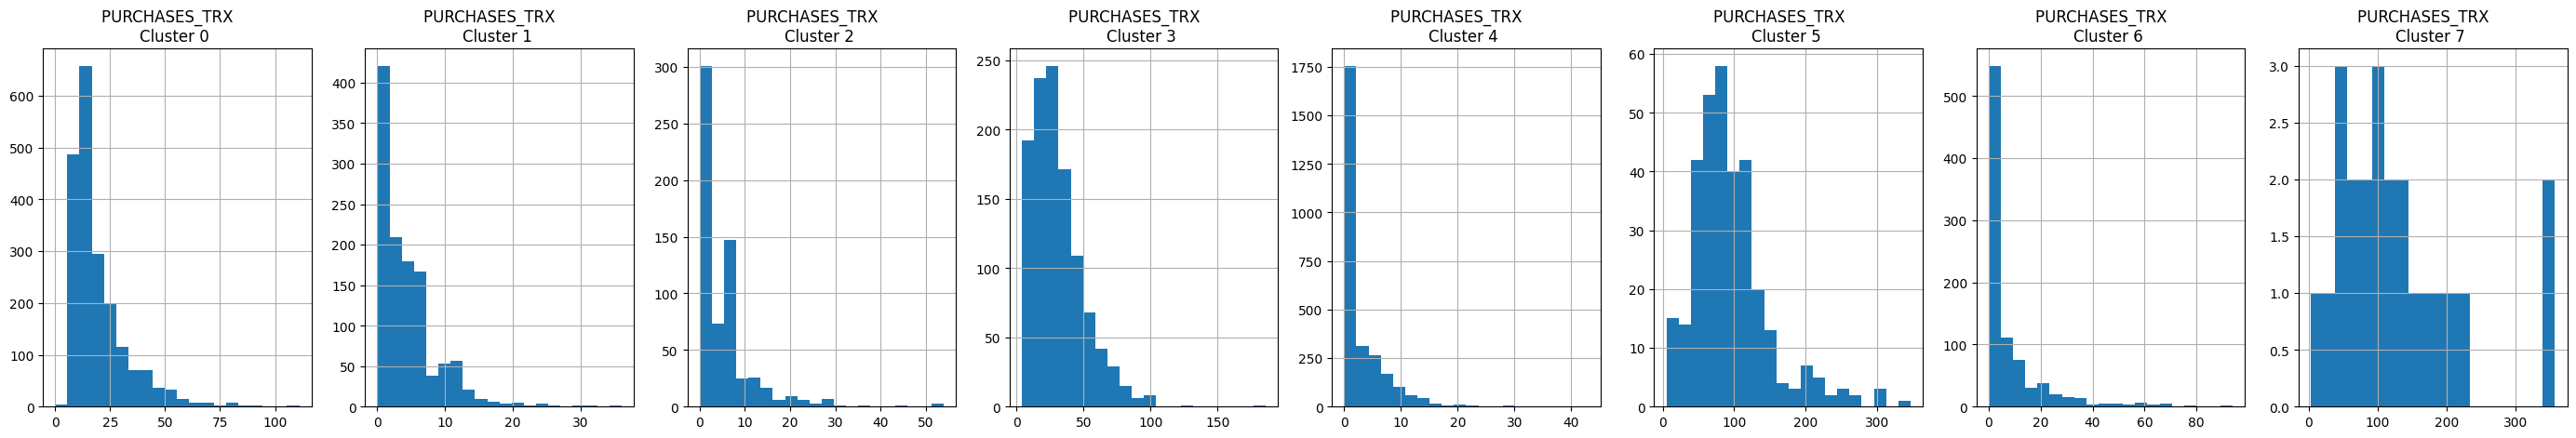

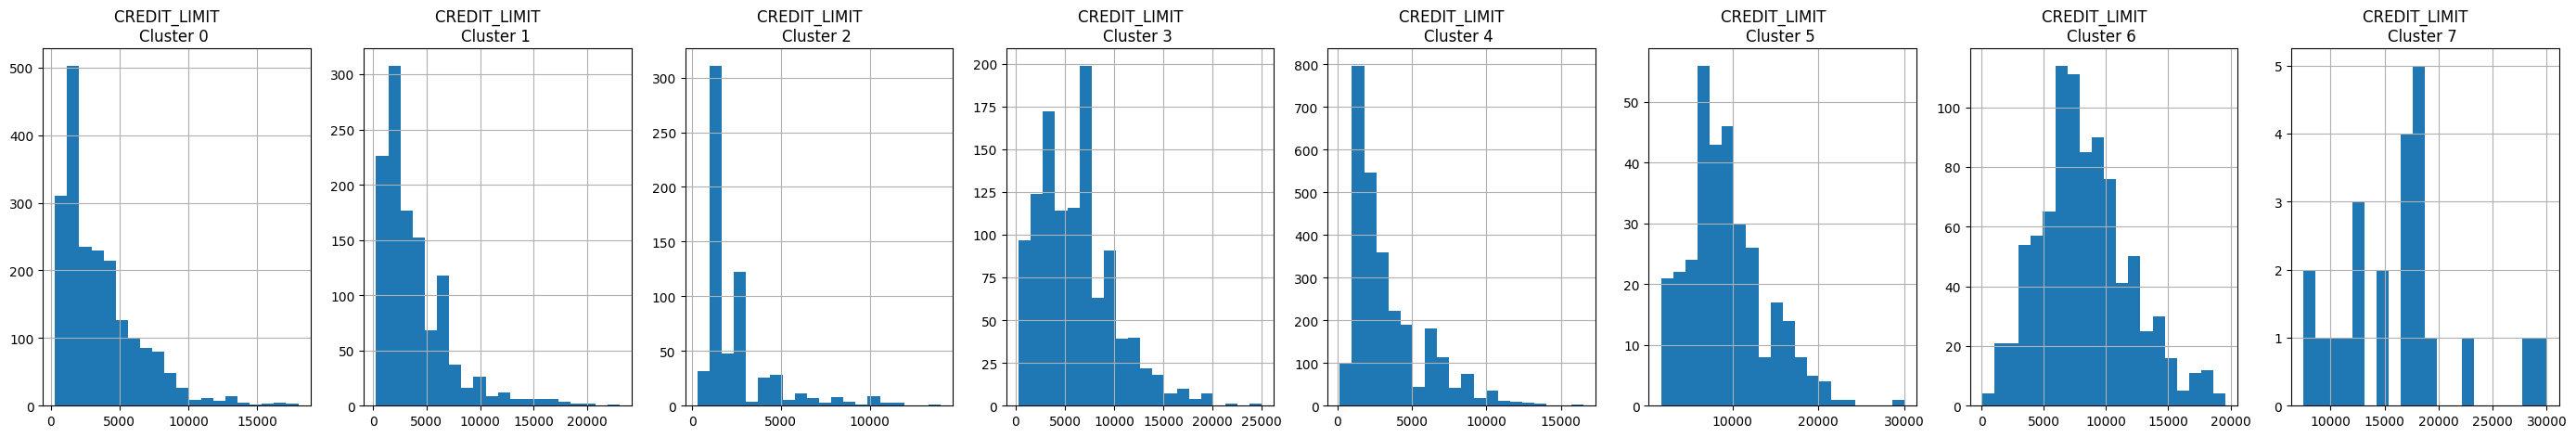

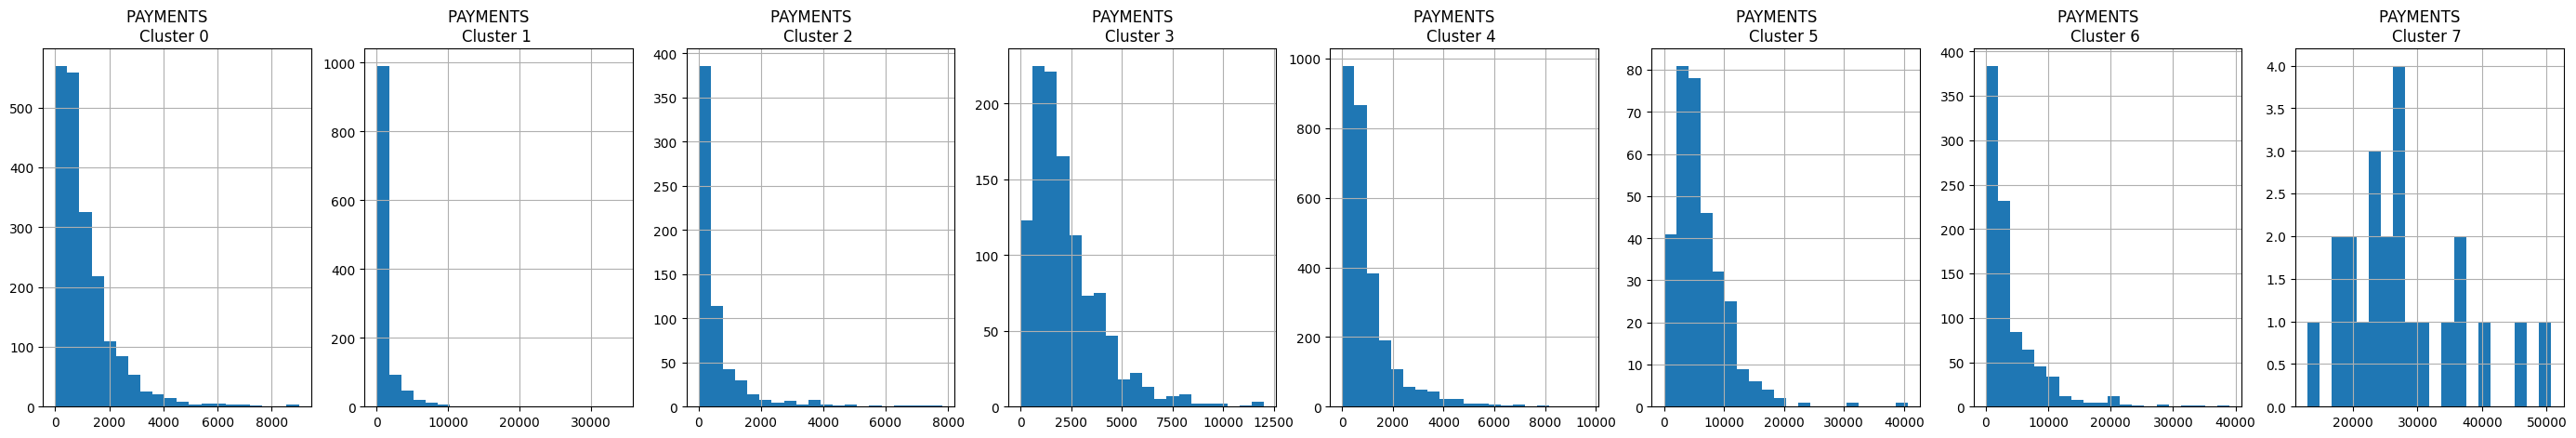

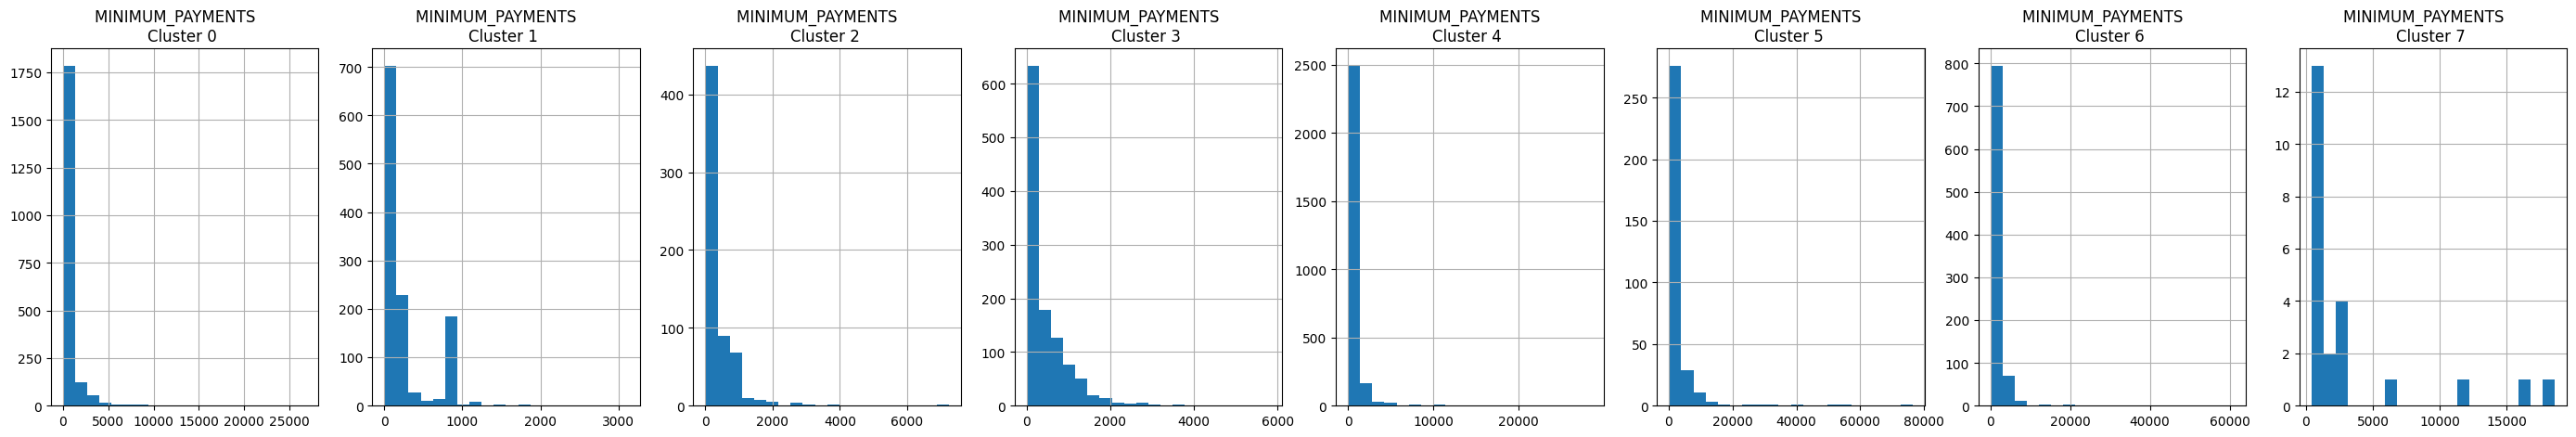

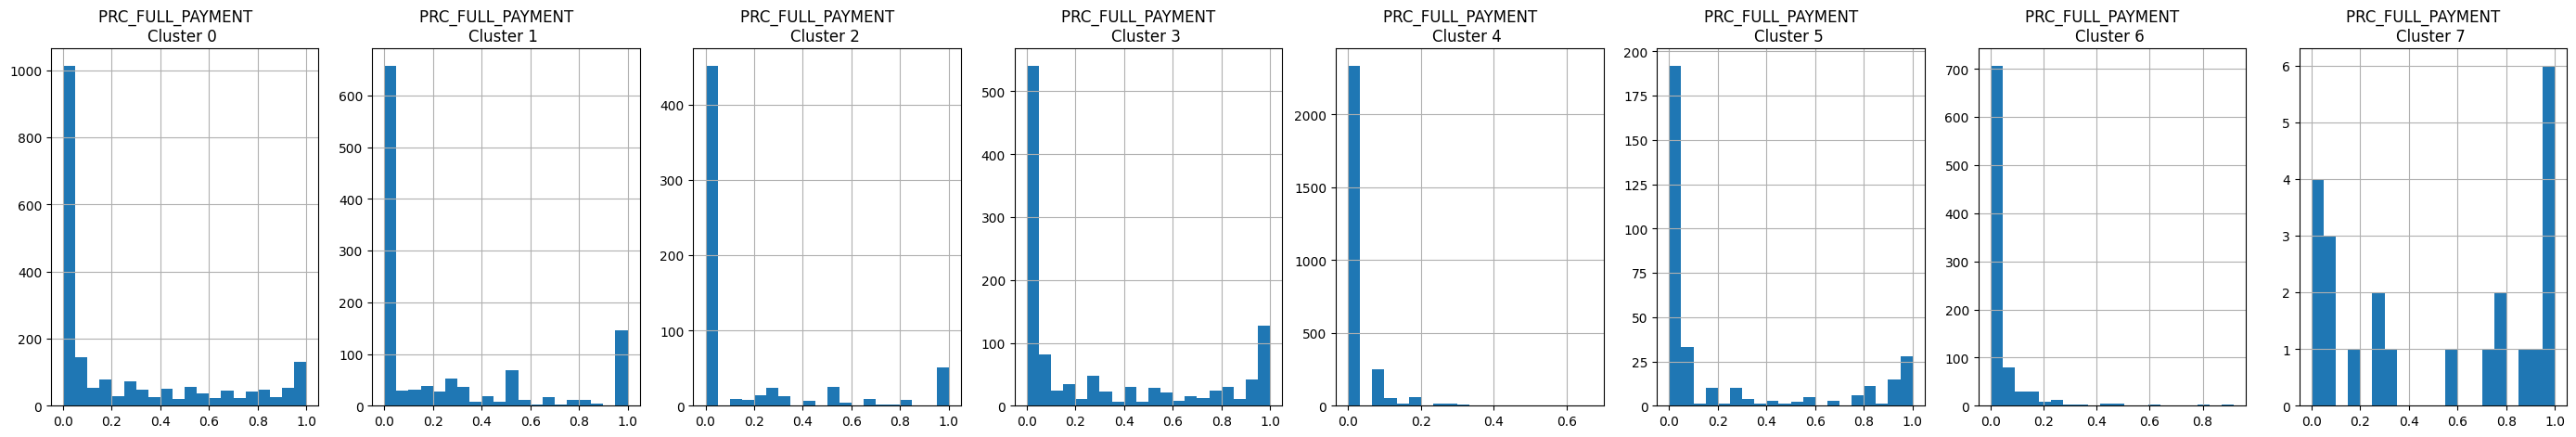

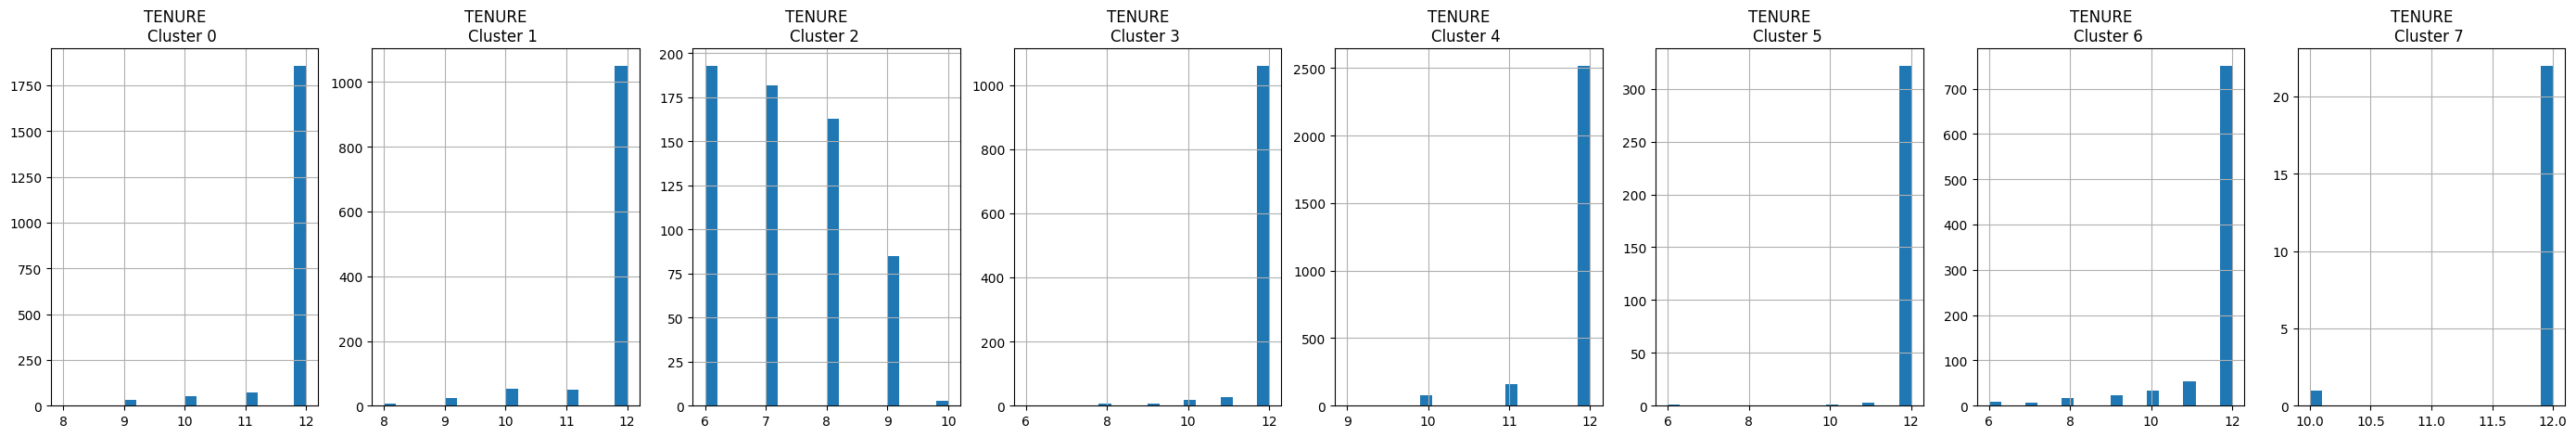

In [38]:
# Plot the histogram of various clusters
for i in creditcard_df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(8):
    plt.subplot(1,8,j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))

  plt.show()



# TASK 7: APPLY PRINCIPAL COMPONENT ANALYSIS AND VISUALIZE THE RESULTS

# Principal Component Analysis Explanation

In [39]:
# Obtain the principal components
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.6822205 , -1.07645336],
       [-1.13829717,  2.50645055],
       [ 0.96966775, -0.38364708],
       ...,
       [-0.9261994 , -1.8107492 ],
       [-2.33654707, -0.65792749],
       [-0.5564276 , -0.4005093 ]])

In [40]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.682220,-1.076453
1,-1.138297,2.506451
2,0.969668,-0.383647
3,-0.873625,0.043183
4,-1.599434,-0.688584


In [41]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682220,-1.076453,4
1,-1.138297,2.506451,6
2,0.969668,-0.383647,3
3,-0.873625,0.043183,4
4,-1.599434,-0.688584,4


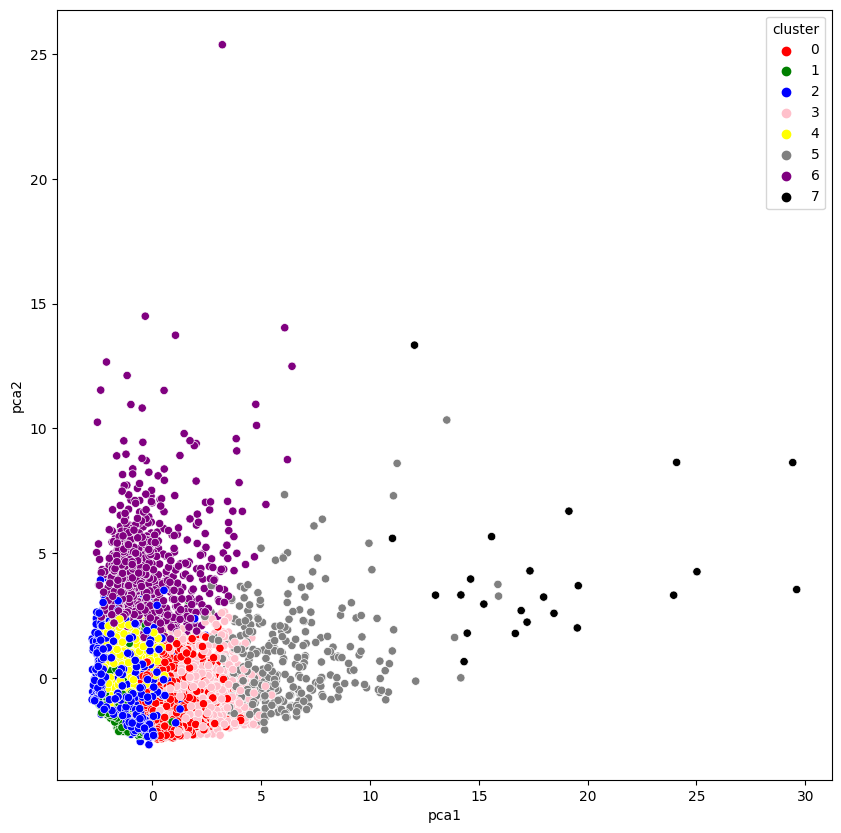

In [42]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple', 'black'])
plt.show()

# TASK #8: UNDERSTAND THE THEORY AND INTUITION BEHIND AUTOENCODERS

# Autoencoders explanation

# TASK #9: APPLY AUTOENCODERS (PERFORM DIMENSIONALITY REDUCTION USING AUTOENCODERS)

In [43]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD

encoding_dim = 7

input_df = Input(shape=(17,))


# Glorot normal initializer (Xavier normal initializer) draws samples from a truncated normal distribution

x = Dense(encoding_dim, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(x)

encoded = Dense(10, activation='relu', kernel_initializer = 'glorot_uniform')(x)

x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)

decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)

# autoencoder
autoencoder = Model(input_df, decoded)

#encoder - used for our dimention reduction
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer= 'adam', loss='mean_squared_error')


In [50]:
creditcard_df_scaled.shape

(8950, 17)

In [51]:
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, batch_size = 128, epochs = 25,  verbose = 1)

Epoch 1/25
70/70 [==============================] - 4s 62ms/step - loss: 0.3079
Epoch 2/25
70/70 [==============================] - 4s 62ms/step - loss: 0.2224
Epoch 3/25
70/70 [==============================] - 6s 90ms/step - loss: 0.1802
Epoch 4/25
70/70 [==============================] - 4s 61ms/step - loss: 0.1554
Epoch 5/25
70/70 [==============================] - 4s 60ms/step - loss: 0.1430
Epoch 6/25
70/70 [==============================] - 7s 102ms/step - loss: 0.1322
Epoch 7/25
70/70 [==============================] - 6s 81ms/step - loss: 0.1193
Epoch 8/25
70/70 [==============================] - 4s 64ms/step - loss: 0.1132
Epoch 9/25
70/70 [==============================] - 7s 97ms/step - loss: 0.1038
Epoch 10/25
70/70 [==============================] - 5s 76ms/step - loss: 0.0982
Epoch 11/25
70/70 [==============================] - 9s 135ms/step - loss: 0.0946
Epoch 12/25
70/70 [==============================] - 8s 115ms/step - loss: 0.0905
Epoch 13/25
70/70 [===============

In [52]:
autoencoder.save_weights('autoencoder.h5')

In [53]:
pred = encoder.predict(creditcard_df_scaled)

280/280 [==============================] - 2s 8ms/step


In [54]:
pred.shape

(8950, 10)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

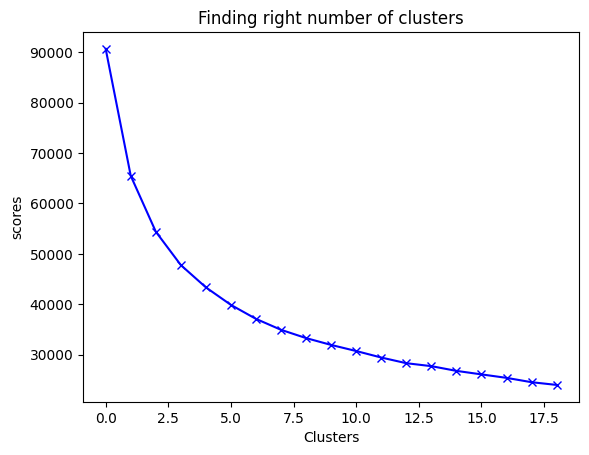

In [55]:
scores_2 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters= i)
  kmeans.fit(pred)
  scores_2.append(kmeans.inertia_)

plt.plot(scores_2, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores')
plt.show()

<ipython-input-56-a03cdc235775>:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(scores_1, 'bx-', color = 'r')
<ipython-input-56-a03cdc235775>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(scores_2, 'bx-', color = 'g')


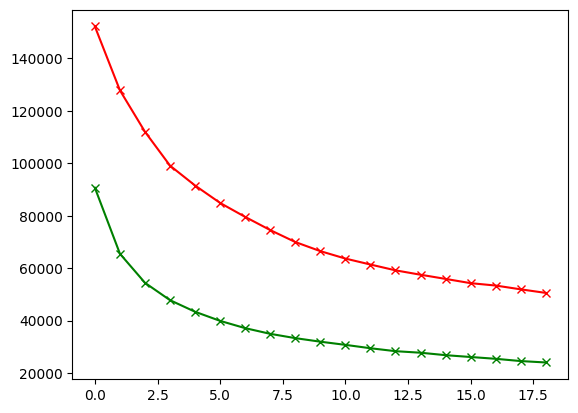

In [56]:
plt.plot(scores_1, 'bx-', color = 'r')
plt.plot(scores_2, 'bx-', color = 'g')

In [57]:
kmeans = KMeans(4)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [58]:
df_cluster_dr = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster_dr.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


In [59]:
pca = PCA(n_components=2)
prin_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = prin_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-2.109062,-0.132357
1,0.779719,1.340489
2,0.033717,-1.087009
3,-1.647604,-0.435720
4,-1.996448,-0.037828


In [60]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-2.109062,-0.132357,1
1,0.779719,1.340489,3
2,0.033717,-1.087009,1
3,-1.647604,-0.435720,1
4,-1.996448,-0.037828,1


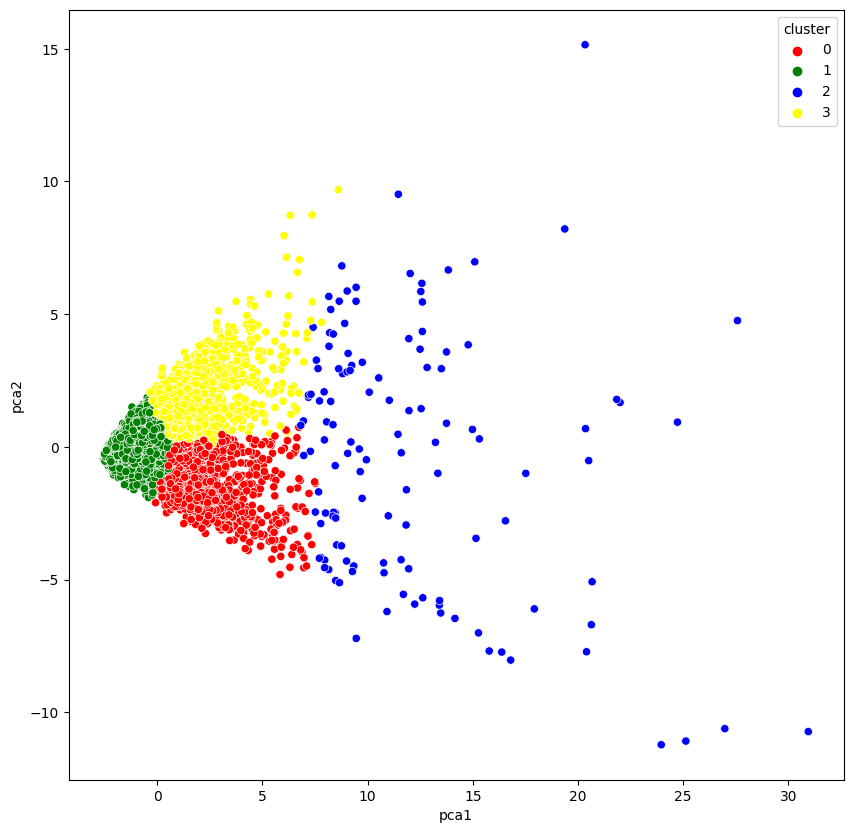

In [61]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','yellow'])
plt.show()

# CONCLUSION :

Aussi bien la méthode des K-means que la méthode du PCA, proposent une classifications des clients en 7 catégories. La segmentation est trés importante pour les entreprises car elle permet de mieux comprendre ses clients et de pouvoir proposer des offres personnalisées pour chaque segment de clients. \

**NB** : Cette segmentation n'est pas fixe. Elle peut être ajuster grâce à plus d'informations de la banque. En effet, toute analyse statistique éfficace est orientée grâce à la vision et les stratégies de l'entreprise.

------

Both the K-means method and the PCA method classify customers into 7 categories. Segmentation is very important for companies, as it enables them to better understand their customers and to be able to propose personalized offers for each customer segment. \

**NB:** This segmentation is not fixed. It can be adjusted with more information from the bank. Indeed, any effective statistical analysis is guided by the company's vision and strategies.

